In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("50_Startups.csv")
df['Date'] = pd.date_range(start='2018-01-01', periods=len(df), freq='M')
df.set_index('Date', inplace=True)
ts = df[['Profit']]
print(ts.head())

               Profit
Date                 
2018-01-31  192261.83
2018-02-28  191792.06
2018-03-31  191050.39
2018-04-30  182901.99
2018-05-31  166187.94


In [3]:
print(df.info())
print(df.describe())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2018-01-31 to 2022-02-28
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.3+ KB
None
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.80

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
df['Expenses'] = df['R&D Spend'] + df['Administration'] + df['Marketing Spend']
df['Revenue'] = df['Profit'] + df['Expenses']

In [5]:
revenue_ts = df['Revenue']
expenses_ts = df['Expenses']
profit_ts = df['Profit']

In [6]:
model = ARIMA(profit_ts, order=(1,1,1))
model_fit = model.fit()

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [7]:
forecast_profit = model_fit.forecast(steps=12)
forecast_profit.index = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(1), periods=12, freq='M')

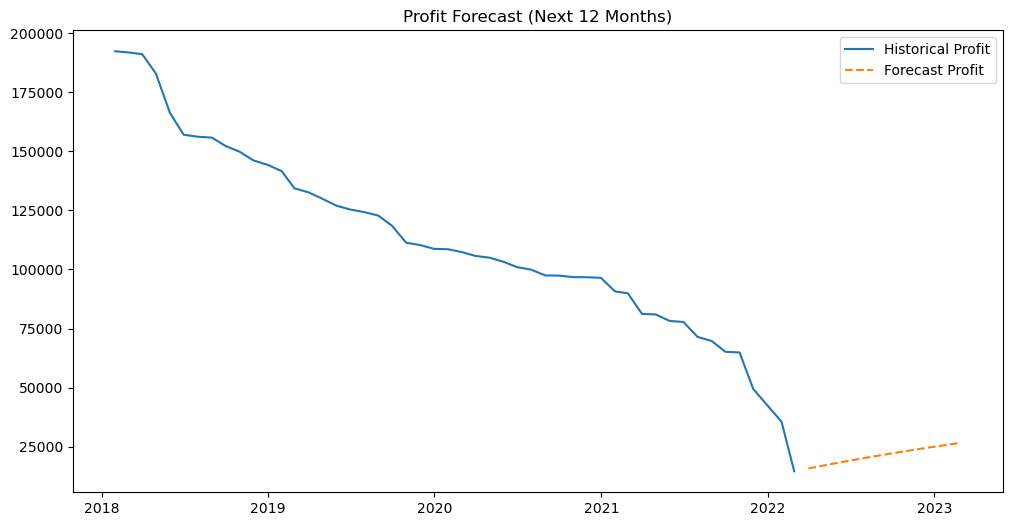

In [8]:
plt.figure(figsize=(12,6))
plt.plot(profit_ts, label="Historical Profit")
plt.plot(forecast_profit, label="Forecast Profit", linestyle="--")
plt.legend()
plt.title("Profit Forecast (Next 12 Months)")
plt.show()

In [9]:
model_rev = ARIMA(revenue_ts, order=(1,1,1))
model_rev_fit = model_rev.fit()

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [10]:
forecast_revenue = model_rev_fit.forecast(steps=12)
forecast_revenue.index = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(1), periods=12, freq='M')

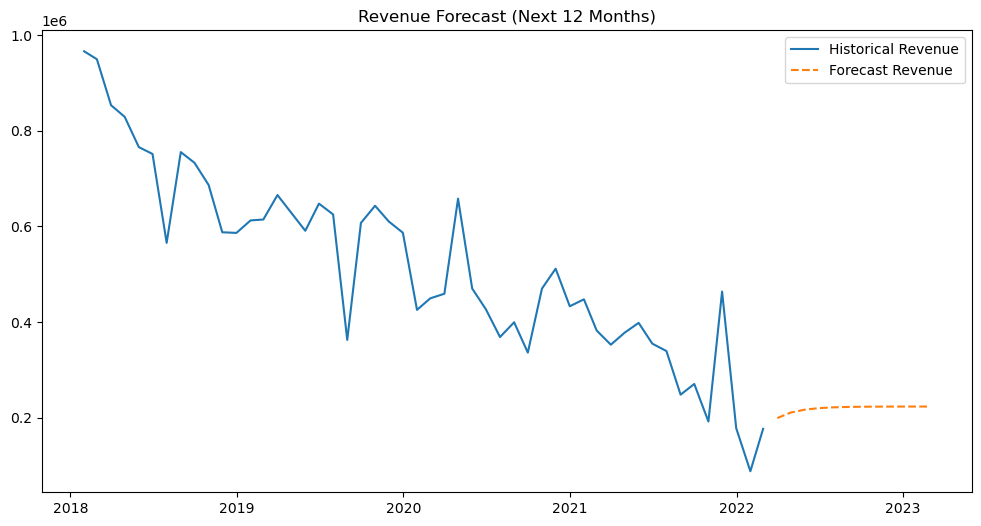

In [11]:
plt.figure(figsize=(12,6))
plt.plot(revenue_ts, label="Historical Revenue")
plt.plot(forecast_revenue, label="Forecast Revenue", linestyle="--")
plt.legend()
plt.title("Revenue Forecast (Next 12 Months)")
plt.show()

In [12]:
model_exp = ARIMA(expenses_ts, order=(1,1,1))
model_exp_fit = model_exp.fit()

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [13]:
forecast_expenses = model_exp_fit.forecast(steps=12)
forecast_expenses.index = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(1), periods=12, freq='M')

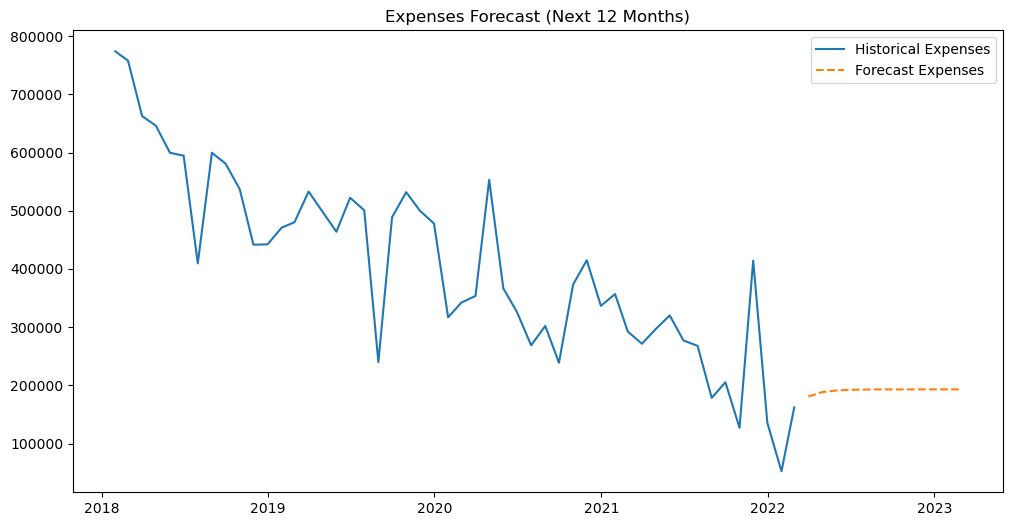

In [14]:
plt.figure(figsize=(12,6))
plt.plot(expenses_ts, label="Historical Expenses")
plt.plot(forecast_expenses, label="Forecast Expenses", linestyle="--")
plt.legend()
plt.title("Expenses Forecast (Next 12 Months)")
plt.show()

In [15]:
output = pd.DataFrame({
    "Historical Profit": profit_ts,
    "Historical Revenue": revenue_ts,
    "Historical Expenses": expenses_ts
})

# Combine forecasts into one DataFrame
forecast_df = pd.concat([forecast_profit, forecast_revenue, forecast_expenses], axis=1)
forecast_df.columns = ["Forecast Profit", "Forecast Revenue", "Forecast Expenses"]

# Merge historical + forecast
final_df = pd.concat([output, forecast_df], axis=0)

# Save to Excel
final_df.to_excel("Financial_Forecast.xlsx", index=True)

print("✅ Forecast exported to Financial_Forecast.xlsx")


✅ Forecast exported to Financial_Forecast.xlsx
